<h1>Kyphosis Disease Classification Project</h1>

IMPORT LIBRARIES AND DATASETS


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pickle

In [ ]:
kyphosis_df=pd.read_csv('kyphosis.csv')
kyphosis_df

Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]

In [ ]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
kyphosis_df.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

PERFORM DATA VISUALIZATION

In [ ]:
LabelEncoder_y = LabelEncoder()
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [ ]:
kyphosis_df

Kyphosis  Age  Number  Start
0          0   71       3      5
1          0  158       3     14
2          1  128       4      5
3          0    2       5      1
4          0    1       4     15
..       ...  ...     ...    ...
76         1  157       3     13
77         0   26       7     13
78         0  120       2     13
79         1   42       7      6
80         0   36       4     13

[81 rows x 4 columns]

In [ ]:
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']==1]

In [ ]:
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']==0]

In [ ]:
print( 'Disease present after operation percentage =', (len(kyphosis_True) / len(kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


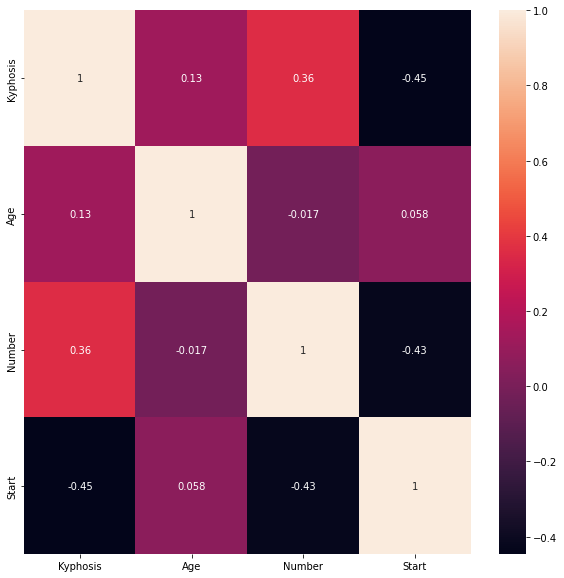

In [ ]:
plt.figure(figsize=(10,10)) 
sns.heatmap(kyphosis_df.corr(), annot= True)

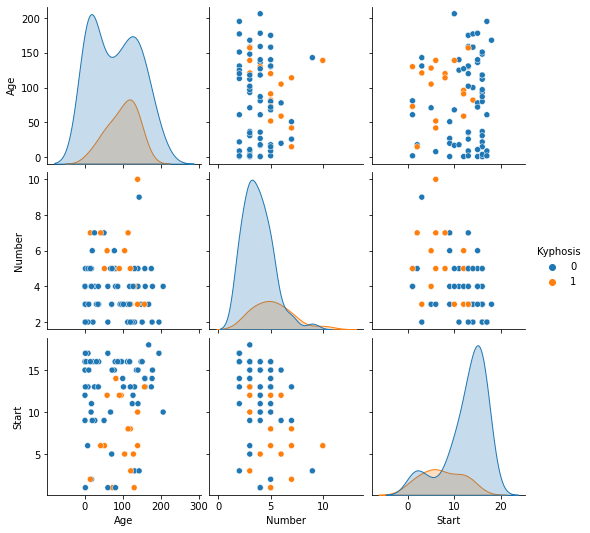

In [ ]:
sns.pairplot(kyphosis_df, hue= 'Kyphosis')

Plotting the data countplot showing how many samples belong to each class

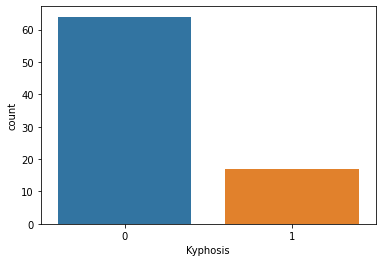

In [ ]:
sns.countplot(x = kyphosis_df['Kyphosis'], label = "Count");

# TASK #4: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [ ]:
# Let's drop the target label coloumns
X = kyphosis_df.drop(['Kyphosis'], axis = 1)
Y = kyphosis_df['Kyphosis']

In [ ]:
X  

Age  Number  Start
0    71       3      5
1   158       3     14
2   128       4      5
3     2       5      1
4     1       4     15
..  ...     ...    ...
76  157       3     13
77   26       7     13
78  120       2     13
79   42       7      6
80   36       4     13

[81 rows x 3 columns]

In [ ]:
Y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2)

In [ ]:
X_train.shape

(64, 3)

In [ ]:
X_test.shape

(17, 3)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# TASK #5: TRAIN A LOGISTIC REGRESSION CLASSIFIER MODEL

In [ ]:
X_train.shape

(64, 3)

In [ ]:
Y_train.shape

(64,)

In [ ]:
X_test.shape

(17, 3)

In [ ]:
Y_test.shape

(17,)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

# TASK #6: EVALUATE TRAINED MODEL PERFORMANCE 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

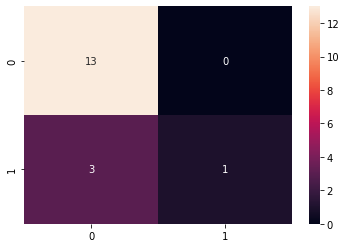

In [ ]:
# Predicting the Test set results
y_predict_test = model.predict(X_test)
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.25      0.40         4

    accuracy                           0.82        17
   macro avg       0.91      0.62      0.65        17
weighted avg       0.86      0.82      0.78        17



#IMPLEMENTING DECISION TREES AND RANDOM FOREST CLASSIFIER MODELS

#IMPROVING THE MODEL 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

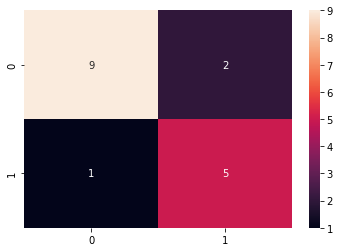

In [ ]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.71      0.83      0.77         6

    accuracy                           0.82        17
   macro avg       0.81      0.83      0.81        17
weighted avg       0.83      0.82      0.83        17



In [ ]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Start     0.542129
Number    0.241251
Age       0.216620


#Implementing the Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, Y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.67      0.67      0.67         3

    accuracy                           0.88        17
   macro avg       0.80      0.80      0.80        17
weighted avg       0.88      0.88      0.88        17



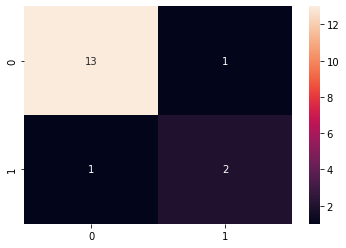

In [ ]:
# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(Y_test, y_predict_test))

In [ ]:
# creating a pickel file
pickle.dump(model, open('randomtree', 'wb'))